<a href="https://colab.research.google.com/github/EAsencios/DEEP-LEARING/blob/master/fi_imagen_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color


In [35]:
cat = io.imread('/content/drive/MyDrive/Colab Notebooks/cat2.jpg')
dog = io.imread('/content/drive/MyDrive/Colab Notebooks/dog2.jpg')
# cat = color.rgb2lab(cat)
# dog = color.rgb2lab(dog)
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])

print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


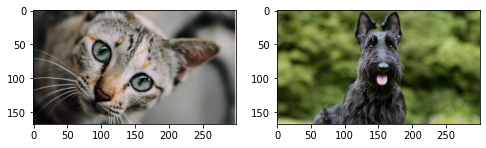

In [36]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dog)

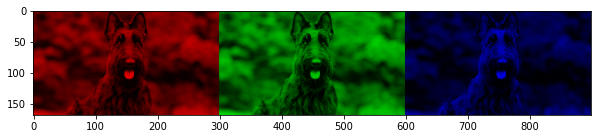

In [37]:
dog_r = dog.copy()                # red channel
dog_r[:,:,1] = dog_r[:,:,2] = 0   # set G, B pixels = 0
dog_g = dog.copy()                # green channel
dog_g[:,:,0] = dog_g[:,:,2] = 0   # set R, B pixels = 0
dog_b = dog.copy()                # blue channel
dog_b[:,:,0] = dog_b[:,:, 1] = 0  # set R, G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize=(10, 4))
plt.imshow(plot_image)

In [38]:
dog_r[:,:,0]

array([[126, 127, 127, ..., 132, 142, 148],
       [118, 121, 123, ..., 140, 147, 152],
       [108, 113, 116, ..., 143, 148, 154],
       ...,
       [202, 201, 200, ..., 156, 154, 153],
       [207, 206, 205, ..., 161, 161, 164],
       [211, 211, 210, ..., 166, 169, 171]], dtype=uint8)

In [39]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image Shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', np.round(cgs.flatten(), 2))

Image Shape: (168, 300) 

2D image pixel map
[[0.21 0.2  0.2  ... 0.39 0.37 1.  ]
 [0.21 0.2  0.2  ... 0.38 0.37 1.  ]
 [0.21 0.2  0.2  ... 0.38 0.37 1.  ]
 ...
 [0.09 0.09 0.08 ... 0.34 0.36 1.  ]
 [0.09 0.09 0.08 ... 0.34 0.35 1.  ]
 [0.09 0.09 0.08 ... 0.34 0.35 1.  ]] 

Flattened pixel map: [0.21 0.2  0.2  ... 0.34 0.35 1.  ]


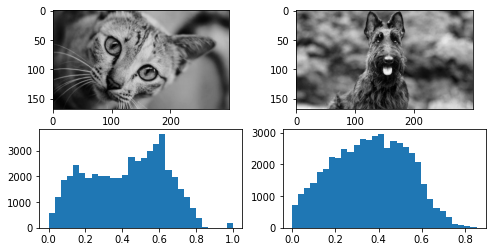

In [40]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap='gray')
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, c_patches = ax4.hist(dgs.flatten(), bins=30)

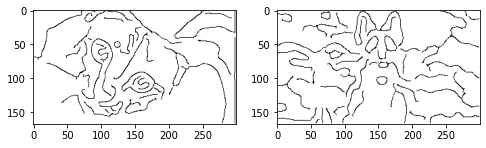

In [41]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')

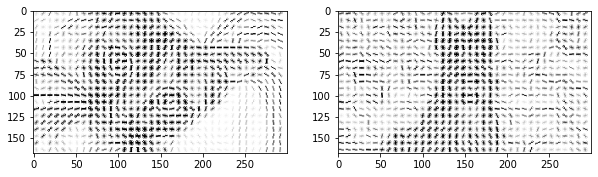

In [42]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hogs, cmap='binary')

In [43]:
print(fd_cat, fd_cat.shape)

[0.22554259 0.0299959  0.04441284 ... 0.00594773 0.00499111 0.21785493] (47880,)


In [44]:
!pip install mahotas

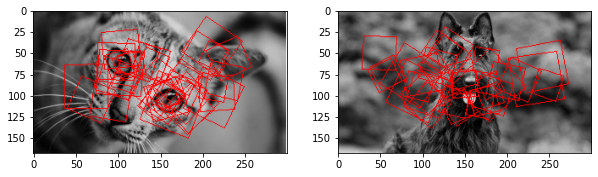

In [45]:
from mahotas.features import surf
import mahotas as mh

cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dog)

cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

In [46]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
cat_surf_fds.shape

(140, 64)

In [47]:
from sklearn.cluster import KMeans

k = 20
km = KMeans(k, n_init=100, max_iter=100)
surf_fd_features = np.array([cat_surf_fds, dog_surf_fds])
km.fit(np.concatenate(surf_fd_features))

vbow_features = []
for feature_desc in surf_fd_features:
  labels = km.predict(feature_desc)
  vbow = np.bincount(labels, minlength=k)
  vbow_features.append(vbow)

vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Cat,0,6,4,11,9,12,4,5,3,8,6,12,0,7,10,0,10,23,8,2
1,Dog,8,6,9,3,10,6,10,6,0,8,1,8,8,14,14,13,2,2,6,6


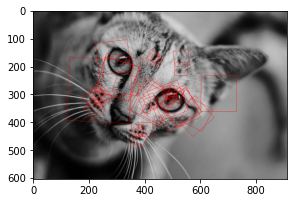

In [48]:
new_cat = io.imread('/content/drive/MyDrive/Colab Notebooks/cat.jpg')
newcat_mh = mh.colors.rgb2gray(new_cat)

newcat_surf = surf.surf(newcat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize= (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(newcat_mh, newcat_surf))

In [49]:
new_surf_fds = surf.dense(newcat_mh, spacing=10)

labels = km.predict(new_surf_fds)
new_vbow = np.bincount(labels, minlength=k)
pd.DataFrame([new_vbow])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140,208,96,151,901,104,106,70,88,105,262,311,19,229,257,521,171,165,87,59


In [50]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

eucdis = euclidean_distances(new_vbow.reshape(1, -1), vbow_features)
cossin = cosine_similarity(new_vbow.reshape(1, -1), vbow_features)

result_df = pd.DataFrame({'EuclideanDistance': eucdis[0], 'CosineSimilarity': cossin[0]})

pd.concat([df, result_df], axis=1)

,Image,EuclideanDistance,CosineSimilarity
0,Cat,1231.448740,0.616011
1,Dog,1228.633387,0.745022


In [51]:
from operator import imod
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

In [52]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(168, 300, 3), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(4, (4,4), activation='relu', kernel_initializer='glorot_uniform'))

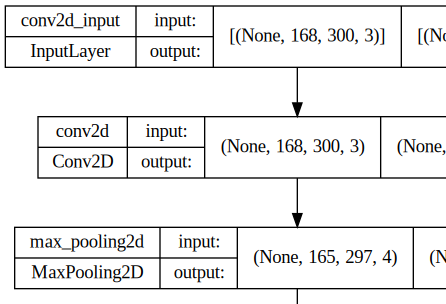

In [53]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))